<a href="https://colab.research.google.com/github/HarshiniVenkat/Machine-Deep-Learning/blob/master/Google_Stock_prices_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
!pip install PyDrive

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
downloaded = drive.CreateFile({'id':"1K8RaYLsi-PQGj9irsO2zmZLd2v_B9qJp"})   # replace the id with id of file you want to access
downloaded.GetContentFile('stock_train.csv') 

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
dataset_train=pd.read_csv("stock_train.csv")
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [0]:
#we are gonna predict RNN values based on the Open value in the dataset
training_set=dataset_train.iloc[:, 1:2].values

In [0]:
print(training_set[0:5])

[[325.25]
 [331.27]
 [329.83]
 [328.34]
 [322.04]]


In [0]:
#perform feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

In [0]:
print(training_set_scaled[0:5])

[[0.08581368]
 [0.09701243]
 [0.09433366]
 [0.09156187]
 [0.07984225]]


In [0]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [0]:
print(X_train[0:1])

[[0.08581368 0.09701243 0.09433366 0.09156187 0.07984225 0.0643277
  0.0585423  0.06568569 0.06109085 0.06639259 0.0614257  0.07474514
  0.02797827 0.02379269 0.02409033 0.0159238  0.01078949 0.00967334
  0.01642607 0.02100231 0.02280676 0.02273235 0.02810849 0.03212665
  0.0433812  0.04475779 0.04790163 0.0440695  0.04648783 0.04745517
  0.04873875 0.03936305 0.04137213 0.04034898 0.04784582 0.04325099
  0.04356723 0.04286033 0.04602277 0.05398467 0.05738894 0.05714711
  0.05569611 0.04421832 0.04514845 0.04605997 0.04412531 0.03675869
  0.04486941 0.05065481 0.05214302 0.05612397 0.05818885 0.06540665
  0.06882953 0.07243843 0.07993526 0.07846566 0.08034452 0.08497656]]


In [0]:
print(y_train[0:1])

[0.08627874]


In [0]:
# Reshaping
#reshaping based on the keras recurrent layers, 3D tensor with shape (batch_size, timesteps, input_dim)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#this is done only because RNN accepts only 3D data

In [0]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [0]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1))) #50 neurons
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 80, return_sequences = True))
regressor.add(Dropout(0.2))

#trial additional layer
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0429
Epoch 2/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0065
Epoch 3/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0059
Epoch 4/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0059
Epoch 5/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0058
Epoch 6/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0049
Epoch 7/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0047
Epoch 8/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0046
Epoch 9/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0056
Epoch 10/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0047
Epoch 11/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0045
Epoch 12/100
1198/1198 [==============================] - 11s

In [0]:
regressor.save("stock_prices_final.h5py")

In [0]:
regressor.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 60, 50)            10400     
_________________________________________________________________
dropout_16 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_17 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_17 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_18 (LSTM)               (None, 60, 80)            41920     
_________________________________________________________________
dropout_18 (Dropout)         (None, 60, 80)            0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 60, 100)          

In [0]:
from keras.models import load_model
regressor= load_model('stock_prices_final.h5py')

In [0]:
downloaded = drive.CreateFile({'id':"1EsW35-Ed3sJzHkwSz6vypPyNXzGLunfi"})   # replace the id with id of file you want to access
downloaded.GetContentFile('stock_test.csv') 
dataset_test = pd.read_csv('stock_test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [0]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)

In [0]:
print(predicted_stock_price[0:10])

[[0.94588625]
 [0.9408989 ]
 [0.94179475]
 [0.94452643]
 [0.9508282 ]
 [0.9619193 ]
 [0.97170556]
 [0.97526205]
 [0.97566676]
 [0.97524214]]


In [0]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [0]:
print(predicted_stock_price[0:10])

[[787.5906 ]
 [784.9096 ]
 [785.3912 ]
 [786.8596 ]
 [790.2472 ]
 [796.2093 ]
 [801.47003]
 [803.38184]
 [803.5994 ]
 [803.37115]]


In [0]:
print(real_stock_price[0:10])

[[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]]


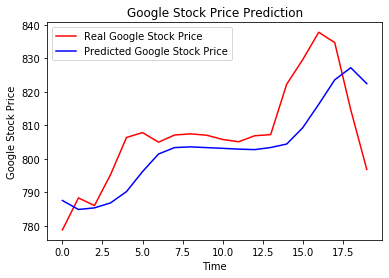

In [0]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()